In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow as tf


In [3]:
import sys
sys.path.append('/global/homes/c/chmodi/Programs/cosmo4d/train_nets-tflow/')
import tools
import datalib as dlib
import datatools as dtools



In [4]:
import importlib
importlib.reload(dlib)
importlib.reload(dtools)

<module 'datatools' from '/global/homes/c/chmodi/Programs/cosmo4d/train_nets-tflow/datatools.py'>

# Basic MNIST

In [6]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [7]:
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 7s 120us/step - loss: 0.2206 - acc: 0.9332
Epoch 2/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.0983 - acc: 0.9705
Epoch 3/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.0688 - acc: 0.9782
Epoch 4/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.0540 - acc: 0.9825
Epoch 5/5
60000/60000 [==============================] - 6s 104us/step - loss: 0.0440 - acc: 0.9853


In [10]:
pred = model.evaluate(x_test, y_test)


10000/10000 [==============================] - 0s 28us/step


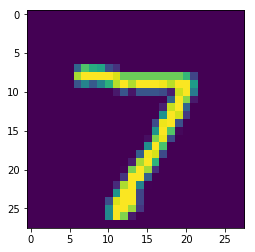

In [12]:
plt.imshow(x_test[0])

In [16]:
from keras.layers import Conv2D

In [ ]:
Conv2D()

# Fully connected


In [6]:
bs = 400
nc, ncf = 128, 512
step, stepf = 5, 40
path = '/project/projectdirs/astro250/chmodi/cosmo4d/data/z00/'
ftype = 'L%04d_N%04d_S%04d_%02dstep/'
numd = 5e-4
num = int(numd*bs**3)
seed= 100
R1 = 3
R2 = 3*1.2
kny = np.pi*nc/bs
kk = tools.fftk((nc, nc, nc), bs)

In [7]:
mesh = tools.readbigfile(path + ftype%(bs, nc, seed, step) + 'mesh/d/')
meshdecic = tools.decic(mesh, kk, kny)
meshR1 = tools.fingauss(mesh, kk, R1, kny)
meshR2 = tools.fingauss(mesh, kk, R2, kny)
meshdg = meshR1 - meshR2
ftlist = [meshdecic.copy(), meshR1.copy(), meshdg.copy()]


hposall = tools.readbigfile(path + ftype%(bs, ncf, seed, stepf) + 'FOF/PeakPosition/')[1:]
hposd = hposall[:num].copy()
hposall = hposall[:2*num]

hpmeshall = tools.paintcic(hposall, bs, nc)
hpmeshd = tools.paintcic(hposd, bs, nc)
clsgrid = hpmeshd.copy()



In [8]:
(mesh[...] > 0.1).sum()/nc**3

0.8841595649719238

In [9]:
(hpmeshall > 0.1).sum()

180633

In [10]:
importlib.reload(dlib)

<module 'datalib' from '/global/homes/c/chmodi/Programs/cosmo4d/train_nets-tflow/datalib.py'>

In [11]:
dind = dtools.balancepts(mesh, blim=1e-2, hfinegrid=hpmeshall, hlim=0.01)
print(dind.shape, dind.shape[0]/nc**3)

317815
(691074, 3) 0.3295297622680664


In [12]:
clim=0
xx, yy, tt = dlib.balanced27gridpt(ftlist, clsgrid, dind, clim=clim, ppy=None, )

Classifying
Number of features is = 3
 y is not Normalized


In [13]:
np.linspace(0.9, 1.1, 40, endpoint=True).size


40

In [14]:
clsmesh = clsgrid.copy()
clsmesh[clsmesh>clim]=1


In [15]:
xx[0].shape, xx[0].mean(axis=0), xx[0].std(axis=0);

In [23]:
tt[0].shape, tt[0].mean(axis=0), tt[0].std(axis=0);

In [24]:
tt[2].shape, tt[2].mean(axis=0), tt[2].std(axis=0);

In [25]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(512, activation=tf.nn.relu),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(2, activation=tf.nn.softmax)
# ])
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['accuracy'])



In [26]:
model.fit(xx[0], yy[0], epochs=10, batch_size=10000)



Epoch 1/10
691074/691074 [==============================] - 8s 12us/step - loss: 0.1727 - acc: 0.8424
Epoch 2/10
691074/691074 [==============================] - 8s 11us/step - loss: 0.1421 - acc: 0.8593
Epoch 3/10
691074/691074 [==============================] - 8s 11us/step - loss: 0.1384 - acc: 0.8627
Epoch 4/10
691074/691074 [==============================] - 8s 11us/step - loss: 0.1357 - acc: 0.8654
Epoch 5/10
691074/691074 [==============================] - 8s 12us/step - loss: 0.1342 - acc: 0.8667
Epoch 6/10
691074/691074 [==============================] - 8s 11us/step - loss: 0.1323 - acc: 0.8685
Epoch 7/10
691074/691074 [==============================] - 8s 11us/step - loss: 0.1314 - acc: 0.8694
Epoch 8/10
691074/691074 [==============================] - 8s 11us/step - loss: 0.1304 - acc: 0.8703
Epoch 9/10
691074/691074 [==============================] - 8s 11us/step - loss: 0.1294 - acc: 0.8712
Epoch 10/10
691074/691074 [==============================] - 8s 11us/step - loss: 

In [27]:
# predict = model.predict_classes(tt[0])
predict = model.predict(tt[0])
predict = predict.reshape(nc, nc, nc)

In [28]:
predictx = model.predict_classes(xx[0])

In [29]:
# (predictx == yy[0]).sum()/yy[0].size
(predictx.reshape(-1) == yy[0]).sum()/yy[0].size


0.8739874456281093

In [30]:
l = 2
(clsmesh[mesh > l] == predict[mesh > l]).sum()/(mesh > l).sum()

0.4292737286697637

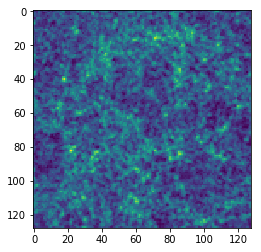

In [31]:
plt.imshow(predict.sum(axis=0))

In [32]:
kmesh = np.sum(i**2 for i in kk)**0.5

/usr/common/software/tensorflow/intel-tensorflow/1.9.0-py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  """Entry point for launching an IPython kernel.


In [33]:
k, p = tools.power(mesh, boxsize=bs, k=kmesh)
k, ph = tools.power(hpmeshd/hpmeshd.mean(), boxsize=bs, k=kmesh)
k, pc = tools.power(clsmesh/clsmesh.mean(), boxsize=bs, k=kmesh)
k, phall = tools.power(hpmeshall/hpmeshall.mean(), boxsize=bs, k=kmesh)
k, pnn = tools.power(predict/predict.mean(), boxsize=bs, k=kmesh)
k, phnnx = tools.power(predict/predict.mean(), hpmeshd/hpmeshd.mean(), boxsize=bs, k=kmesh)
k, pcnnx = tools.power(predict/predict.mean(), clsmesh/clsmesh.mean(), boxsize=bs, k=kmesh)


[]

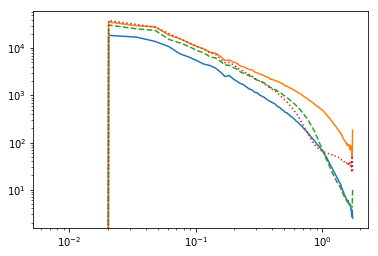

In [34]:
plt.plot(k, p)
plt.plot(k, ph)
plt.plot(k, pc, '--')
plt.plot(k, pnn, ':')
plt.loglog()

/usr/common/software/tensorflow/intel-tensorflow/1.9.0-py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/common/software/tensorflow/intel-tensorflow/1.9.0-py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


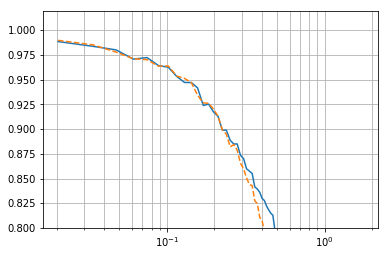

In [35]:
plt.plot(k, phnnx/(ph*pnn)**0.5)
plt.plot(k, pcnnx/(pc*pnn)**0.5, '--')
plt.xscale('log')
plt.ylim(0.8, 1.02)
plt.grid(which='both')

/usr/common/software/tensorflow/intel-tensorflow/1.9.0-py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/common/software/tensorflow/intel-tensorflow/1.9.0-py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


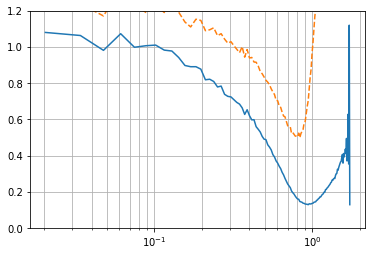

In [36]:
plt.plot(k, pnn/ph)
plt.plot(k, pnn/pc, '--')
plt.xscale('log')
plt.ylim(0.,1.2 )
plt.grid(which='both')

(array([1850686.,    7822.,    4894.,    4017.,    3547.,    3376.,
           3625.,    4210.,    6311.,  208664.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

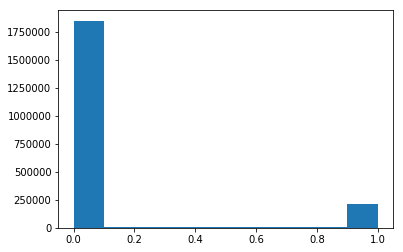

In [37]:
plt.hist(predict.flatten())

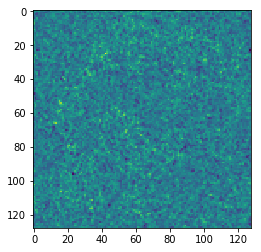

In [38]:
plt.imshow((predict-clsmesh).sum(axis=0))

# CNN

In [41]:
bs = 400
nc, ncf = 128, 512
step, stepf = 5, 40
path = '/project/projectdirs/astro250/chmodi/cosmo4d/data/z00/'
ftype = 'L%04d_N%04d_S%04d_%02dstep/'
numd = 5e-4
num = int(numd*bs**3)
seed= 100
R1 = 3
R2 = 3*1.2
kny = np.pi*nc/bs
kk = tools.fftk((nc, nc, nc), bs)

0.9885892868041992

In [71]:
mesh = tools.readbigfile(path + ftype%(bs, nc, seed, step) + 'mesh/d/')
meshdecic = tools.decic(mesh, kk, kny)
meshR1 = tools.fingauss(mesh, kk, R1, kny)
meshR2 = tools.fingauss(mesh, kk, R2, kny)
meshdg = meshR1 - meshR2
ftlist = [meshdecic.copy(), meshR1.copy(), meshdg.copy()]


hposall = tools.readbigfile(path + ftype%(bs, ncf, seed, stepf) + 'FOF/PeakPosition/')[1:]
hposd = hposall[:num].copy()
hposall = hposall[:2*num]

# hpmeshall = tools.paintcic(hposall, bs, nc)
# hpmeshd = tools.paintcic(hposd, bs, nc)
# clsgrid = hpmeshd.copy()
hpmeshall = tools.paintnn(hposall, bs, nc)
hpmeshd = tools.paintnn(hposd, bs, nc)
clsgrid = hpmeshd.copy()



In [86]:

num_cubes=1000
box_size = 32
max_offset = 128 - box_size
cube_features = []
cube_target = []

for it in range(num_cubes):
    # Extract random cubes from the sim
    offset_x = round(rand()*max_offset)
    offset_y = round(rand()*max_offset)
    offset_z = round(rand()*max_offset)
    
#     cube_features.append( clip(log10(mesh[offset_x:offset_x+box_size,
#                                           offset_y:offset_y+box_size,
#                                           offset_z:offset_z+box_size] + 0.1),0,None))
    
    cube_features.append( 1.0*(mesh[offset_x:offset_x+box_size,
                                          offset_y:offset_y+box_size,
                                          offset_z:offset_z+box_size]))

    cube_target.append(1.0*(hpmeshd[offset_x:offset_x+box_size,
                                          offset_y:offset_y+box_size,
                                          offset_z:offset_z+box_size] ))
    
cube_target = np.stack(cube_target,axis=0).reshape((-1,box_size,box_size,box_size,1))
cube_features = np.stack(cube_features,axis=0).reshape((-1,box_size,box_size,box_size,1))

In [83]:
for i in range(1000):
    if not cube_target[i].sum(): print(i)

In [84]:
cube_target[0];

In [ ]:
np.ran

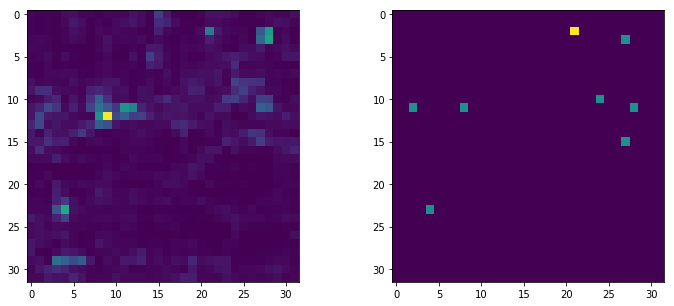

In [87]:
fig, ax = subplots(1, 2, figsize = (12, 5))

i = 10
# ax[0].imshow(cube_features[i][:,:,:,0].sum(axis=0))
# ax[1].imshow(cube_target[i][:,:,:,0].sum(axis=0))
ax[0].imshow(cube_features[i][0,:,:,0])
ax[1].imshow(cube_target[i][0,:,:,0])

In [25]:
import tensorflow.contrib.slim as slim
from tensorflow.contrib.slim import add_arg_scope

In [88]:
# Implement a simple masked CNN layer
# Using the shifting idea of the pixelCNN++

@add_arg_scope
def down_right_shifted_conv3d(x, num_filters, filter_size=[2,2,2], stride=[1,1,1], **kwargs):
    x = tf.pad(x, [[0,0], [filter_size[0]-1, 0], [filter_size[1]-1, 0], [filter_size[2]-1, 0], [0,0]])
    return slim.conv3d(x, num_filters, filter_size, stride=stride, padding='valid', **kwargs)

batch_size=32

# Input features, density field
x = tf.placeholder(tf.float32, shape=[batch_size, 32,32,32,1])

# Output features, halos
y = tf.placeholder(tf.float32, shape=[batch_size, 32,32,32,1])
lr = tf.placeholder(tf.float32)

# Apply a masked convolution at the input y to prevent self-connection
# net = tf.concat([slim.conv3d(x, 16, 3, activation_fn=tf.nn.leaky_relu),
#                  down_right_shifted_conv3d(y, 16, activation_fn=tf.nn.leaky_relu)],axis=-1)
net = slim.conv3d(x, 16, 3, activation_fn=tf.nn.leaky_relu)
net = slim.conv3`d(net, 64, 3, activation_fn=tf.nn.leaky_relu) #down_right_shifted_conv3d(net, 32, activation_fn=tf.nn.leaky_relu)
net = slim.conv3d(net, 16, 3, activation_fn=tf.nn.leaky_relu)#down_right_shifted_conv3d(net, 1, activation_fn=None)
net = slim.conv3d(net, 1, 3, activation_fn=None)
pred = tf.nn.sigmoid(net)

loss = tf.losses.sigmoid_cross_entropy(y, net)

In [89]:
optimizer = tf.train.AdamOptimizer(learning_rate=lr)

opt_op = optimizer.minimize(loss)

In [90]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [91]:
losses = []

In [94]:
niter= 100

for it in range(niter):
    inds = np.random.choice(1000, batch_size, replace=False)
    _, l = sess.run([opt_op, loss], feed_dict={lr:0.0001, x:cube_features[inds], y:cube_target[inds]})
    print(it, l)
    if it % 100 == 0:
        print(l)
    losses.append(l)

0 0.5929017
0.5929017
1 0.5710636
2 0.5542762
3 0.5280172
4 0.5078995
5 0.48920602
6 0.46998727
7 0.4519106
8 0.43614233
9 0.4113227
10 0.39728737


KeyboardInterrupt: 

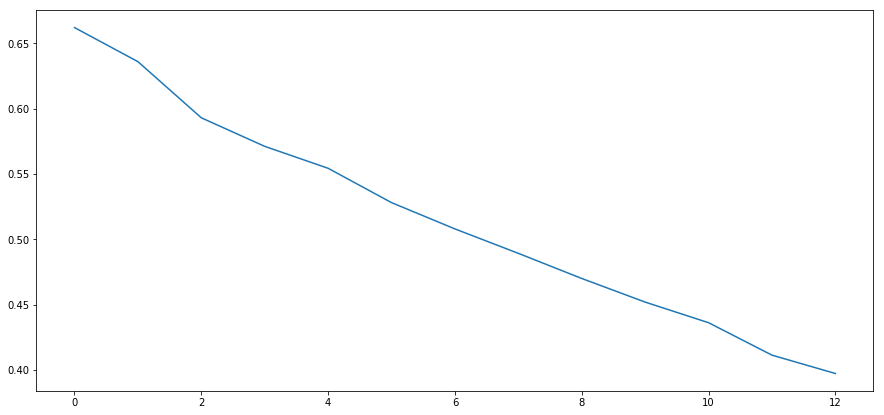

In [95]:
plot(losses)

In [96]:
rec,recp = sess.run([net, pred], feed_dict={x:cube_features[inds], y:cube_target[inds]})

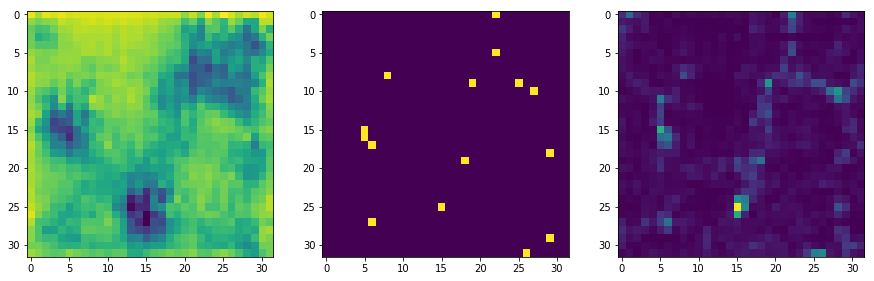

In [97]:
figsize(15,7)
subplot(131)
imshow(recp[3,0,:,:,0]);
subplot(132)
imshow(cube_target[inds][3,0,:,:,0],vmax=1);
subplot(133)
imshow(cube_features[inds][3,0,:,:,0]);